In [2]:
import pandas as pd

df = pd.read_csv('D:\\New folder (2)\\My Final Year Project\\sms-spam-classifier-main_2\\sms-spam-classifier-main\\spam.csv', encoding='ISO-8859-1')
df.sample(5)  # View a random sample of 5 rows
df.shape      # Check the dimensions of the dataset

(5572, 5)

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.sample(5)  # View a random sample of 5 rows

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3062,spam,"Hi babe its Jordan, how r u? Im home from abro...",NaN,NaN,NaN
2860,ham,I am not at all happy with what you saying or ...,NaN,NaN,NaN
4881,ham,As usual u can call me ard 10 smth.,NaN,NaN,NaN
2791,ham,"Û_ we r stayin here an extra week, back next ...",Well there's still a bit left if you guys want...,NaN,NaN
374,spam,"Thanks for your Ringtone Order, Reference T91....",NaN,NaN,NaN


In [5]:
df.info()  # Summary of the dataset including data types and non-null counts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.sample(5)

,v1,v2
3855,ham,I'm ok. Will do my part tomorrow
706,ham,So when do you wanna gym harri
2641,spam,"You are guaranteed the latest Nokia Phone, a 4..."
3692,ham,I was about to do it when i texted. I finished...
2054,ham,Y so late but i need to go n get da laptop...


In [7]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.sample(5)


,target,text
1275,ham,Wot u up 2 u weirdo?
4774,ham,So many people seems to be special at first si...
59,ham,Yes..gauti and sehwag out of odi series.
4151,ham,What's nannys address?
2871,ham,See you there!


In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])  # Spam = 1, Ham = 0
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.isnull().sum()  # Check for missing values
df.duplicated().sum()  # Check for duplicate rows
df = df.drop_duplicates(keep='first')  # Remove duplicate rows
df.shape  # Check the new shape of the dataset


(5169, 2)

In [11]:
#EDA

In [12]:
df['target'].value_counts()  # Check the balance between spam and ham


target
0    4516
1     653
Name: count, dtype: int64

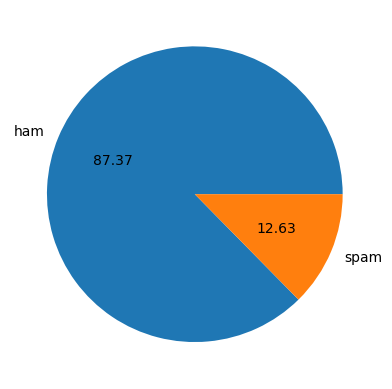

In [13]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()


In [14]:
import nltk
nltk.download('punkt')  # Download necessary NLTK data

df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df[['num_characters', 'num_words', 'num_sentences']].describe()


[nltk_data] Downloading package punkt to C:\Users\Eldad
[nltk_data]     Boateng\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


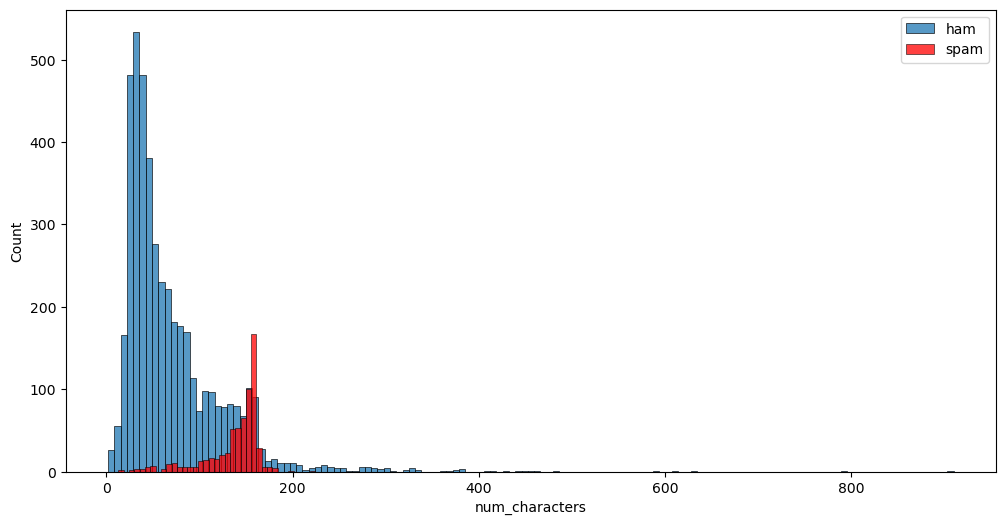

In [15]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_characters'], label='ham')
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='spam')
plt.legend()
plt.show()


In [16]:
#Text Preprocessing

In [17]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    # Remove special characters and numbers
    text = [word for word in text if word.isalnum()]
    
    # Remove stopwords and punctuation
    text = [word for word in text if word not in stopwords.words('english') and word not in string.punctuation]
    
    # Stemming
    text = [ps.stem(word) for word in text]
    
    return " ".join(text)


In [18]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


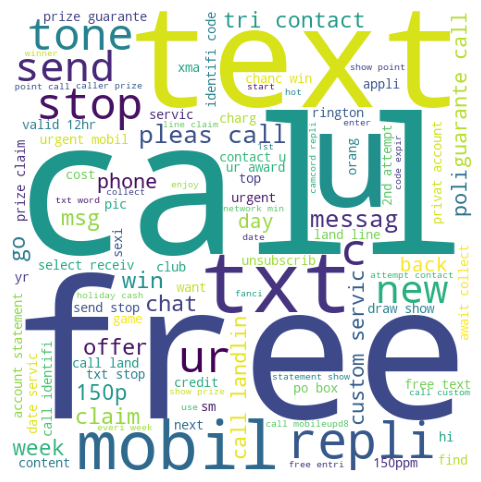

In [19]:
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)
plt.axis('off')
plt.show()


In [20]:
#Model Building

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))


Accuracy: 0.9709864603481625
Precision: 1.0


In [24]:
#Evaluation

In [25]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))


[[896   0]
 [ 30 108]]
Precision: 1.0


In [26]:
#Model Improvement

In [27]:
tfidf = TfidfVectorizer(max_features=5000)  # Experiment with different values


In [29]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Define the Voting Classifier
voting = VotingClassifier(estimators=[('nb', mnb), ('svc', SVC(probability=True))], voting='soft')
voting.fit(X_train, y_train)

# Predict and evaluate
y_pred = voting.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))


Accuracy: 0.9816247582205029
Precision: 0.976


In [30]:
import pickle

# Save the TF-IDF vectorizer and the trained Multinomial Naive Bayes model
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))


In [31]:
# Saving the TF-IDF Vectorizer
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)

# Saving the Trained Model
with open('model.pkl', 'wb') as file:
    pickle.dump(mnb, file)


In [32]:
# Loading the TF-IDF Vectorizer
with open('vectorizer.pkl', 'rb') as file:
    tfidf = pickle.load(file)

# Loading the Trained Model
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)


In [33]:
# Sample text message
sample_text = ["Congratulations! You've won a $1000 gift card. Call now to claim."]

# Transforming the text using the loaded vectorizer
transformed_text = tfidf.transform(sample_text)

# Making prediction using the loaded model
prediction = model.predict(transformed_text)

# Interpreting the result
if prediction[0] == 1:
    print("Spam")
else:
    print("Ham")


NotFittedError: The TF-IDF vectorizer is not fitted

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Step 1: Fit the vectorizer on your text data
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()

# Step 2: Save the fitted vectorizer
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)

# Step 3: Save the trained model
with open('model.pkl', 'wb') as file:
    pickle.dump(mnb, file)


In [36]:
import pickle

# Step 1: Load the vectorizer
with open('vectorizer.pkl', 'rb') as file:
    tfidf = pickle.load(file)

# Step 2: Load the trained model
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

# Example text to classify
sample_text = ["Hey how are you doing dear."]

# Step 3: Transform the sample text using the loaded vectorizer
transformed_text = tfidf.transform(sample_text)

# Step 4: Make predictions using the loaded model
prediction = model.predict(transformed_text)

# Output the prediction
print("Spam" if prediction[0] == 1 else "Ham")


Ham
